# Données fournies par OVH

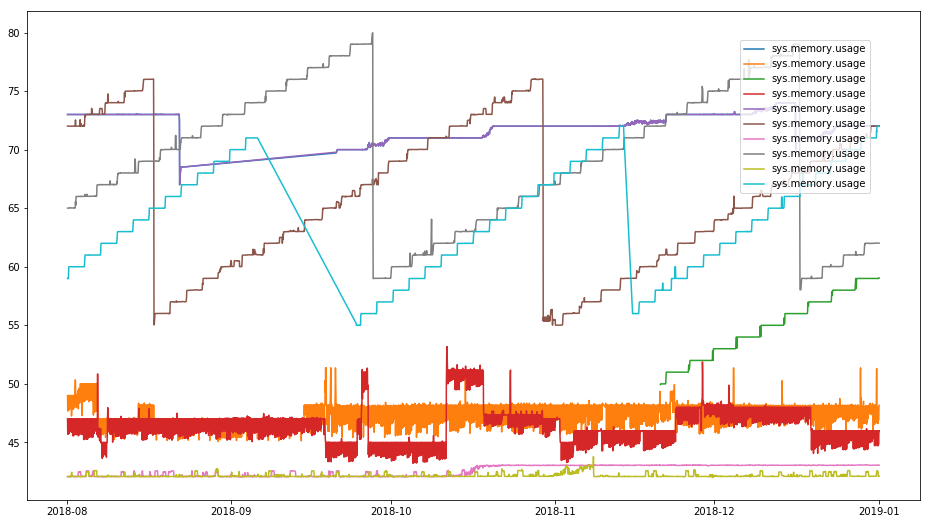

In [25]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import codecs
import nbformat

from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as sts
from datetime import datetime
from scipy.fftpack import dct, idct
from nbconvert import HTMLExporter
from sklearn.svm import SVC
from sklearn import preprocessing

cwd = os.getcwd()

def exportHTML():
    exporter = HTMLExporter()
    output_notebook = nbformat.read(cwd + '/TL-Segmentation.ipynb', as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(cwd[:-4] + 'common/challenge_doc/TL-Segmentation.html', 'w+', encoding='utf-8').write(output)

_data = None
with open(cwd[:-4] + 'common/challenge_doc/data.json') as json_file:  
    _data = np.array(json.load(json_file))
    
fig, ax = plt.subplots(0, figsize=(16, 9))

ax = plt.subplot(1, 1, 1)

n = _data.shape[0]

for i in range(n):
    legend = _data[i]['c']
    values = np.array(_data[i]['v'])

    x, y = map(datetime.fromtimestamp,values[:, 0]/10**6), values[:, 1]
    ax = plt.plot(x, y, label = legend)
    
ax = plt.axis('on')
plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))
plt.show()

exportHTML()

En statistique et en économétrie, et en particulier en analyse des séries temporelles, un modèle de moyenne mobile intégrée autorégressive (ARIMA) est une généralisation d'un modèle de moyenne mobile autorégressive (ARMA). Ces deux modèles sont adaptés aux séries temporelles soit pour mieux comprendre les données, soit pour prédire les futurs points de ces séries (prévision).

## Part 1: Décomposition des séries temporelles
Nous décomposerons les séries temporelles pour les estimations des composantes tendancielles, saisonnières et aléatoires en utilisant la méthode de la moyenne mobile.

Pour des raisons de simplifications théoriques, mathématiques et de mise en pratique nous feront l'hypothèse que les séries temporelles étudiées suivent un modèle mutliplicatif.

Une série temporelle $Y$ suivant un modèle multiplicatif peut s'écrire :

$$Y[t]=T[t]\cdot S[t] \cdot R[t]$$

Avec :

Y(t) est la valeur de la série temporelle au court du temps t,
T(t) est la composante tendancielle au temps t,
S(t) est la composante saisonnière au temps t,
R(t) est la composante d'erreur aléatoire au temps t.

Avec ce modèle, nous utiliserons les fonctions de décomposition du package "statsmodels" de python et nous tracerons ces composants décomposés pour analyser plus en détail les données.

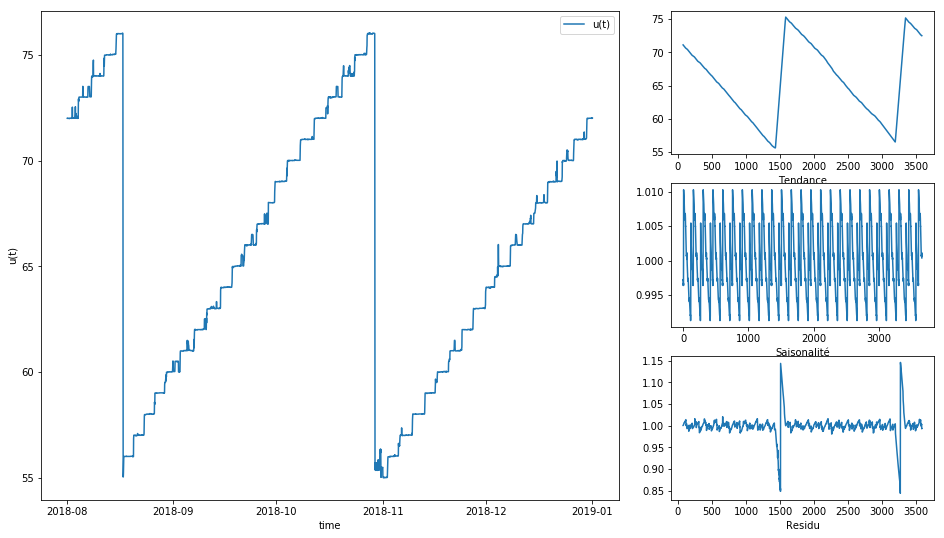

In [65]:
from random import randrange
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose


values = np.array(_data[5]['v'])
x, y = map(datetime.fromtimestamp,values[:, 0]/10**6), values[:, 1]

result = seasonal_decompose(y, model='multiplicative', freq=3600/24)
trend, seasonal, resid = result.trend, result.seasonal, result.resid

fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(3, 3)

ax = fig.add_subplot(gs[0:3, 0:2])
ax.plot(x, y, label='u(t)')
ax.set_ylabel('u(t)')
ax.set_xlabel('time')
ax.legend()

ax = fig.add_subplot(gs[0, 2:])
ax.plot(trend)
ax.set_xlabel('Tendance')

ax = fig.add_subplot(gs[1, 2:])
ax.plot(seasonal)
ax.set_xlabel(u'Saisonalité')

ax = fig.add_subplot(gs[2, 2:])
ax.plot(resid)
ax.set_xlabel(u'Residu')


plt.show()


exportHTML()

A travers ces tracés, nous pouvons à nouveau voir la 'tendance' et la 'saisonnalité' telles que présentées précédemment, nous pouvons également observer l'estimation de la composante aléatoire représentée comme étant le 'reste'.

### Saisonalité du dataset

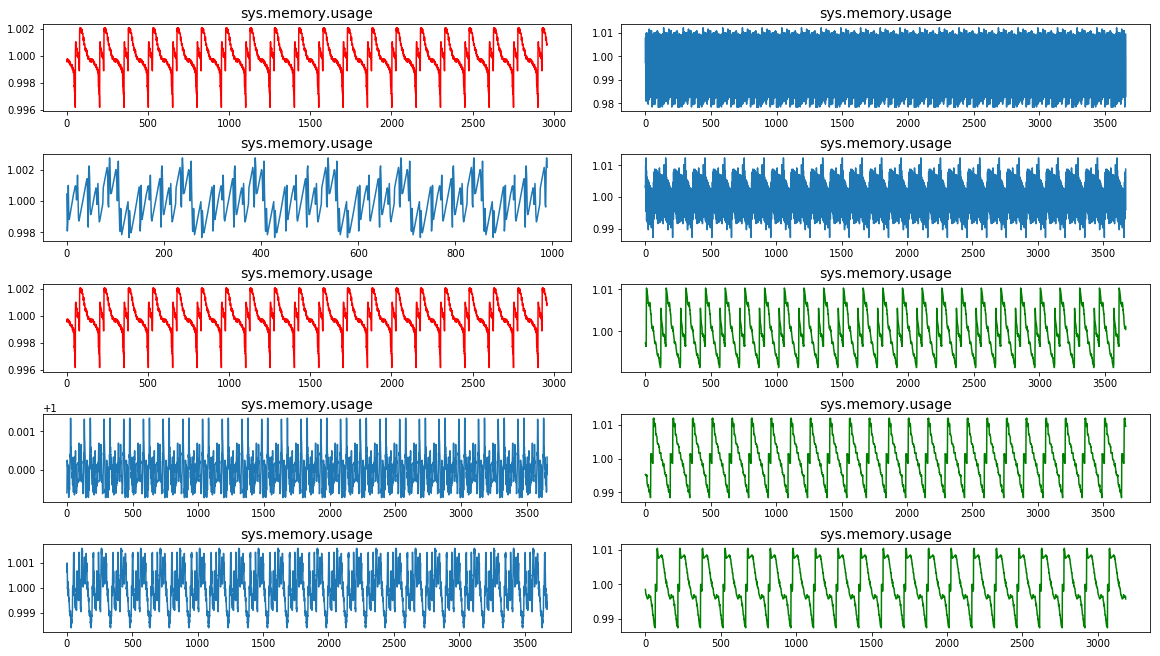

In [27]:
_data = None
with open(cwd[:-4] + 'common/challenge_doc/data.json') as json_file:  
    _data = np.array(json.load(json_file))
    
fig, axs = plt.subplots(figsize=(16, 9), nrows=5, ncols=2, constrained_layout=True)

for ax, i in zip(axs.flatten(), range(10+1)):
    legend = _data[i]['c']
    values = np.array(_data[i]['v'])

    x, y = map(datetime.fromtimestamp,values[:, 0]/1000000), values[:, 1]
    
    result = seasonal_decompose(y, model='mutliplicative', freq=3600/24)
    
    if(i == 0 or i == 4):
        ax.plot(range(result.seasonal.shape[0]), result.seasonal, color='red')
    elif(i == 5 or i == 7 or i == 9):
        ax.plot(range(result.seasonal.shape[0]), result.seasonal, color='green')
    else:
        ax.plot(range(result.seasonal.shape[0]), result.seasonal)
        
    ax.set_title(legend, fontsize=14)
    
exportHTML()

### Tendance du dataset

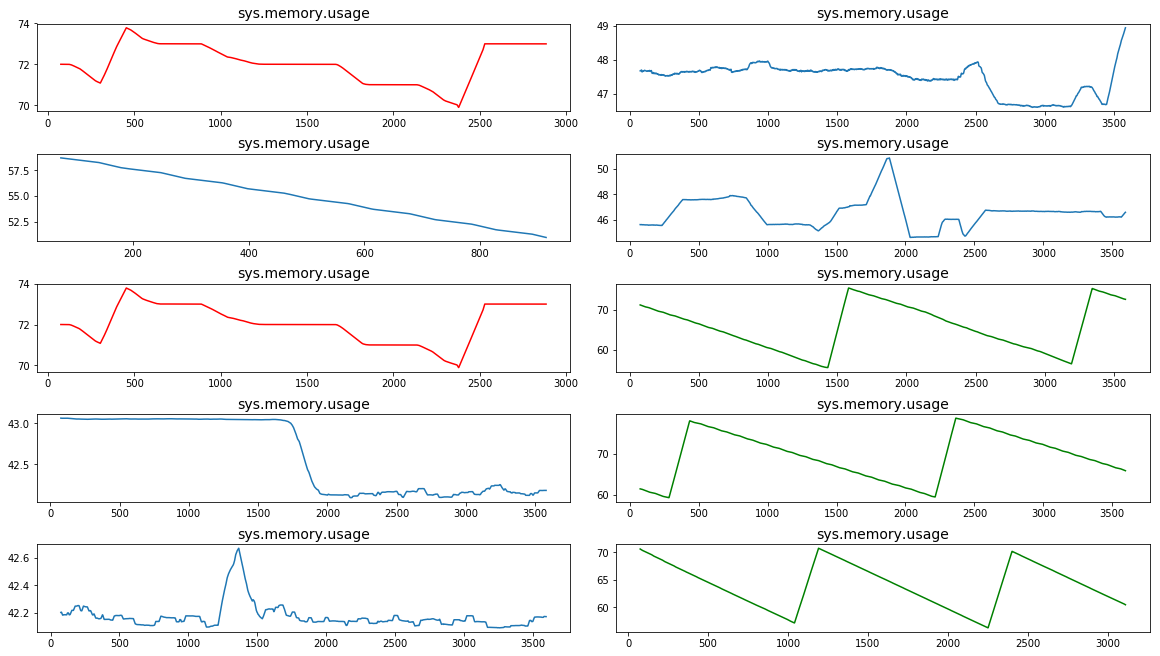

In [28]:
_data = None
with open(cwd[:-4] + 'common/challenge_doc/data.json') as json_file:  
    _data = np.array(json.load(json_file))
    
fig, axs = plt.subplots(figsize=(16, 9), nrows=5, ncols=2, constrained_layout=True)

for ax, i in zip(axs.flatten(), range(10+1)):
    legend = _data[i]['c']
    values = np.array(_data[i]['v'])

    x, y = map(datetime.fromtimestamp,values[:, 0]/1000000), values[:, 1]
    
    result = seasonal_decompose(y, model='mutliplicative', freq=3600/24)
    
    if(i == 0 or i == 4):
        ax.plot(range(result.trend.shape[0]), result.trend, color='red')
    elif(i == 5 or i == 7 or i == 9):
        ax.plot(range(result.trend.shape[0]), result.trend, color='green')
    else:
        ax.plot(range(result.trend.shape[0]), result.trend)
        
    ax.set_title(legend, fontsize=14)
    
exportHTML()

### Résidus du dataset

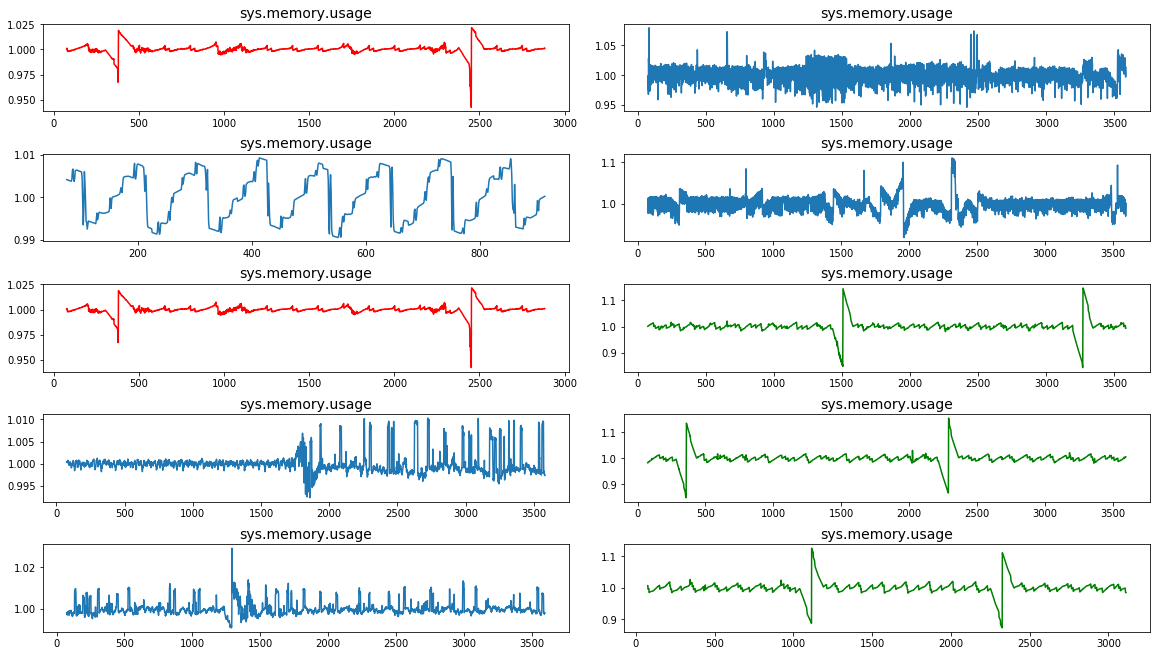

In [29]:
_data = None
with open(cwd[:-4] + 'common/challenge_doc/data.json') as json_file:  
    _data = np.array(json.load(json_file))
    
fig, axs = plt.subplots(figsize=(16, 9), nrows=5, ncols=2, constrained_layout=True)

for ax, i in zip(axs.flatten(), range(10+1)):
    legend = _data[i]['c']
    values = np.array(_data[i]['v'])

    x, y = map(datetime.fromtimestamp,values[:, 0]/1000000), values[:, 1]
    
    result = seasonal_decompose(y, model='mutliplicative', freq=3600/24)
    
    if(i == 0 or i == 4):
        ax.plot(range(result.resid.shape[0]), result.resid, color='red')
    elif(i == 5 or i == 7 or i == 9):
        ax.plot(range(result.resid.shape[0]), result.resid, color='green')
    else:
        ax.plot(range(result.resid.shape[0]), result.resid)
        
    ax.set_title(legend, fontsize=14)
    
exportHTML()



On fait l'hypothèse que les séries temporelles que nous traitons ne peuvent provenir que de deux classes uniquement : en vert et en rouge.

# Part 2: Tentative de segmentation des séries temporelles du datasets

In [30]:
def computeFeatures(arr, windowsize, class_id):
    l = np.shape(arr)[0]
    _arrs = np.array_split(arr, l//windowsize)
    
    _V = np.array([np.var(a) for a in _arrs])
    _S = np.array([sts.skew(a) for a in _arrs])
    _K = np.array([sts.kurtosis(a) for a in _arrs])
    _M = np.array([np.mean(a) for a in _arrs])
    _C = class_id*np.ones(l//windowsize, dtype = np.int)#Class
    
    d = {'Variance': _V, 'Skewness': _S, 
         'Kurtosis': _K, 'Mean': _M, 'Class': _C}
    
    return pd.DataFrame(data=d)

### Create dataset
def get_S_for_data(i):
    values = np.array(_data[0]['v'])
    x, y = map(datetime.fromtimestamp,values[:, 0]/10**6), values[:, 1]
    result = seasonal_decompose(y, model='mutliplicative', freq=3600/24)
    T, S, R = result.trend, result.seasonal, result.resid

    S = S[~np.isnan(S)]
    
    return S

f0_0 = computeFeatures(get_S_for_data(0), 100, 0)
f4_0 = computeFeatures(get_S_for_data(4), 100, 0)

f5_1 = computeFeatures(get_S_for_data(5), 100, 1)
f7_1 = computeFeatures(get_S_for_data(7), 100, 1)
f9_1 = computeFeatures(get_S_for_data(9), 100, 1)

data = pd.concat([f0_0, f4_0, f5_1, f7_1, f9_1])

exportHTML()


In [31]:
X = data.drop('Class', axis=1)
y = data['Class']

#Normalization
X=(X-X.min())/(X.max()-X.min())

print X.head
print "Dataset : {} lines, {} features".format(X.shape[0], X.shape[1])


<bound method DataFrame.head of     Kurtosis      Mean  Skewness  Variance
0   0.218866  0.449671  0.581394  0.921296
1   0.724801  0.111972  0.191893  0.195596
2   0.022790  1.000000  0.869877  0.075836
3   0.187711  0.545226  0.513394  0.991479
4   0.825723  0.073269  0.088464  0.131639
5   0.019936  0.945172  0.907882  0.108675
6   0.196498  0.603102  0.464514  1.000000
7   0.910157  0.046753  0.038633  0.093675
8   0.010764  0.905533  0.915392  0.145748
9   0.226935  0.658775  0.413334  0.986314
10  1.000000  0.015924  0.000000  0.058449
11  0.000000  0.872302  0.905802  0.187586
12  0.273939  0.702933  0.369683  0.953553
13  0.949624  0.000000  0.162502  0.097447
14  0.008256  0.837405  0.925414  0.183279
15  0.330349  0.739630  0.331993  0.911994
16  0.651534  0.123158  0.557809  0.391746
17  0.104863  0.666051  0.977840  0.102779
18  0.419790  0.784372  0.285226  0.848047
19  0.419465  0.244714  0.635981  0.641381
20  0.204755  0.493139  1.000000  0.000000
21  0.536653  0.829316

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [33]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
y_pred = svclassifier.predict(X_test)  

### Métriques relatives à la segmentation :

In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[ 0  8]
 [ 0 21]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.72      1.00      0.84        21

   micro avg       0.72      0.72      0.72        29
   macro avg       0.36      0.50      0.42        29
weighted avg       0.52      0.72      0.61        29



/Users/theotaburet/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/theotaburet/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/theotaburet/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


On peut voir ici que le système ne parvient pas a distinguer les deux classes cela est surement du au fait que la fenêtre d'échantillonage utilisé est beaucoup trop petite ainsi les features choisies ne descrivent pas correctement les séries temporelles. En somme ils nous manque des données.

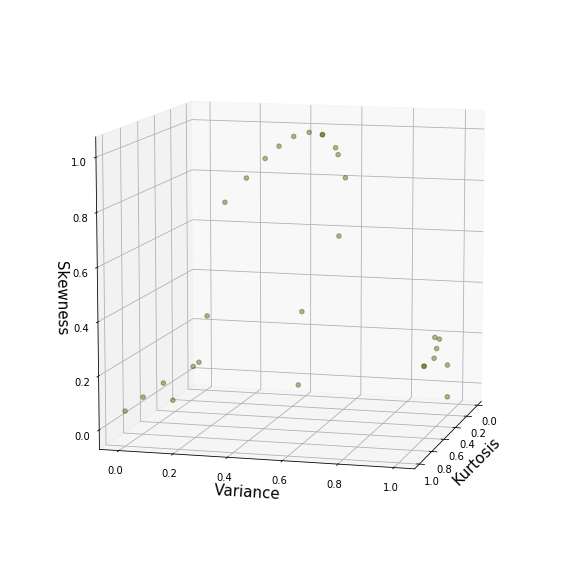

In [36]:
_X = X.drop('Mean', axis=1).values
_Y = y.values

_z = lambda _x, _y: (-svclassifier.intercept_[0]-svclassifier.coef_[0][0]*_x-svclassifier.coef_[0][1]*_y) / svclassifier.coef_[0][2]

tmp = np.linspace(0, 1, 100)
_x, _y = np.meshgrid(tmp, tmp)

fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111, projection='3d')
#ax.plot_surface(_x, _y, _z(_x, _y),
#                cmap='jet',
#                antialiased=True, alpha=0.5,
#                vmin=0,
#                rstride=10,
#                cstride=10,
#                vmax=10)
ax.scatter3D(_X[_Y==0,0], _X[_Y==0,1], _X[_Y==0,2], c='Red', alpha = 0.1)
ax.scatter3D(_X[_Y==1,0], _X[_Y==1,1], _X[_Y==1,2], c='Green', alpha = 0.1)

ax.set_xlabel('Kurtosis', fontsize=15)
ax.set_ylabel('Variance', fontsize=15)
ax.set_zlabel('Skewness', fontsize=15)

ax.view_init(azim=15, elev=10)
plt.show()

## Les attentes de la segmentation :

N'ayant que peut de données et n'ayant pas réussi à en générer correctement la segmentation n'aurait de toutes façon pas pu fonctionner. 

Une idée pour remedier a ce problème pourrait être de procéder à de la 'data augmentation' pour l'exemple, générer des courbes d'équations : 

$$Y(t) = T[t] \cdot (S[t] \cdot noise(t)) \cdot (R[t]+noise(t)) $$

Pour enrichir le dataset initial.

Nous aurions aimé faire presque aussi bien que ce que l'implémentation des SVMs peut produire sur un dataset de deux classe l'une provenant de réalisation d'un bruit gaussien et l'autre provenant de réalisation d'un bruit de Poisson :

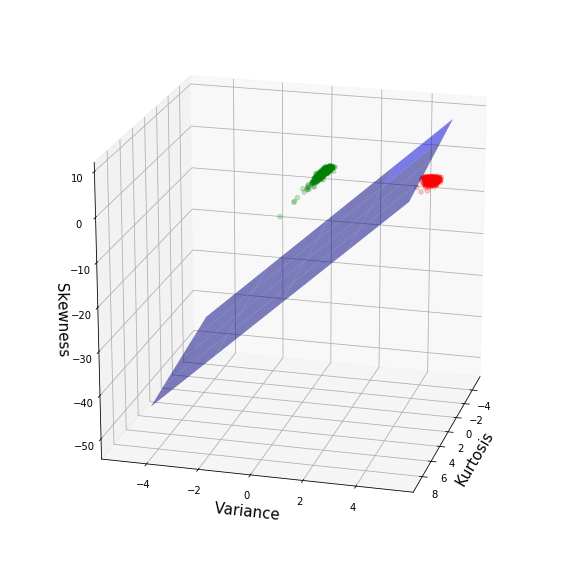

In [37]:
from sklearn.svm import SVC

s = 100000
arr_1 = np.random.normal(5, 2, s)
arr_2 = np.random.poisson(1, s)

features_class_1 = computeFeatures(arr_1, 200, 0)
features_class_2 = computeFeatures(arr_2, 200, 1)

data = pd.concat([features_class_1, features_class_2])

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

y_pred = svclassifier.predict(X_test)  

_X = X.drop('Variance', axis=1).values
_Y = y.values

_z = lambda _x, _y: (-svclassifier.intercept_[0]-svclassifier.coef_[0][0]*_x-svclassifier.coef_[0][1]*_y) / svclassifier.coef_[0][2]

tmp = np.linspace(-5, 5, 40)
_x, _y = np.meshgrid(tmp, tmp)

# Plot stuff.
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(_x, _y, _z(_x, _y),
                cmap='jet',
                antialiased=True, alpha=0.5,
                vmin=0,
                rstride=10,
                cstride=10,
                vmax=10)
ax.scatter3D(_X[_Y==0,0], _X[_Y==0,1], _X[_Y==0,2], c='Red', alpha = 0.2)
ax.scatter3D(_X[_Y==1,0], _X[_Y==1,1], _X[_Y==1,2], c='Green', alpha = 0.2)

ax.set_xlabel('Kurtosis', fontsize=15)
ax.set_ylabel('Variance', fontsize=15)
ax.set_zlabel('Skewness', fontsize=15)

ax.view_init(azim=15, elev=20)
plt.show()

exportHTML()

# Part 3 : But

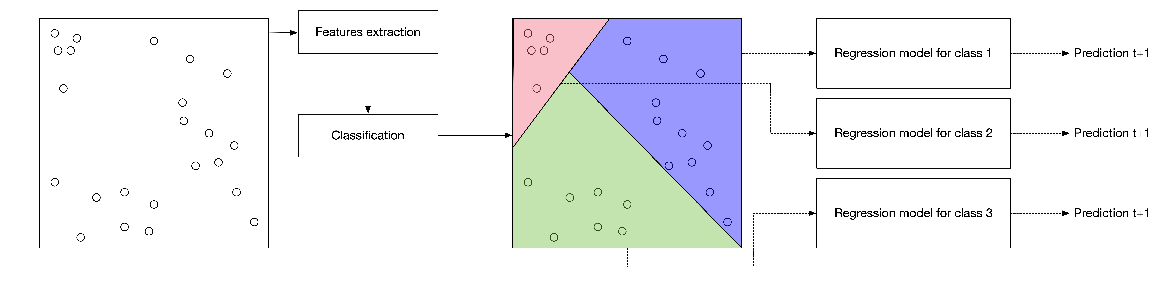

In [61]:
fig, ax = plt.subplots(0, figsize=(20, 9))

ax = plt.subplot(1, 1, 1)
ax = plt.imshow(plt.imread('./Pipeline.png'))    
ax = plt.axis('off')
plt.show()

On fait le postulat que les TS peuvent individuellement être traiter par des algorithme de regression. Seulement le dataset est composé d'un mélange de TS hétérogène. Ainsi nous proposons de segmenter le dataset afin d'attribuer à chaque groupe de TS l'algorithme de prédiction adéquat.